<a href="https://colab.research.google.com/github/jaro19853/dw_matrix_road_signs/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import os
import datetime

from sklearn.metrics import accuracy_score

%reload_ext tensorboard
import matplotlib.pyplot as plt
from skimage import color, exposure


In [95]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_signs'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_signs


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')


X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


In [97]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

    Flatten(),

    Dense(num_classes, activation='softmax')
])

ERROR! Session/line number was not unique in database. History logging moved to new session 64


In [0]:
def get_cnn_vl(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

    Flatten(),

    Dense(num_classes, activation='softmax'),
])


def train_model(model, X_train,y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train,y_train)),
      callbacks=[tensorboard_callback]
  )
  return model

In [99]:

model = get_cnn_vl(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 48.4440 - accuracy: 0.6831 - val_loss: 0.3151 - val_accuracy: 0.9267
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2571 - accuracy: 0.9406 - val_loss: 0.1481 - val_accuracy: 0.9624
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1423 - accuracy: 0.9668 - val_loss: 0.1181 - val_accuracy: 0.9725
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1379 - accuracy: 0.9687 - val_loss: 0.0892 - val_accuracy: 0.9798
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0927 - accuracy: 0.9794 - val_loss: 0.0802 - val_accuracy: 0.9832


In [0]:

df= pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [0]:

def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)       

  y_pred_prob = model_trained.predict(X_test)   
  y_pred = np.argmax(y_pred_prob, axis=1)       

  return scoring(y_test_norm, y_pred)

In [102]:
predict(model_trained, X_test, y_test)

0.810204081632653

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [104]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax'),
])
train_and_predict(get_cnn_v2(input_shape, num_classes))


ERROR! Session/line number was not unique in database. History logging moved to new session 65
Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 5.4934 - accuracy: 0.2910 - val_loss: 1.2406 - val_accuracy: 0.6819
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 1.1537 - accuracy: 0.6574 - val_loss: 0.3782 - val_accuracy: 0.9094
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.6335 - accuracy: 0.8092 - val_loss: 0.2409 - val_accuracy: 0.9436
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.4357 - accuracy: 0.8704 - val_loss: 0.1099 - val_accuracy: 0.9715
Epoch 5/5
272/272 [==============================] - 3s 9ms/step - loss: 0.3379 - accuracy: 0.8997 - val_loss: 0.0680 - val_accuracy: 0.9860


0.9199546485260771

In [105]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
])
train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 2.2445 - accuracy: 0.5121 - val_loss: 0.4420 - val_accuracy: 0.9093
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.5473 - accuracy: 0.8436 - val_loss: 0.1179 - val_accuracy: 0.9715
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.3089 - accuracy: 0.9110 - val_loss: 0.0563 - val_accuracy: 0.9886
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1902 - accuracy: 0.9438 - val_loss: 0.0372 - val_accuracy: 0.9917
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1389 - accuracy: 0.9597 - val_loss: 0.0232 - val_accuracy: 0.9941


0.9784580498866213

In [106]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same'),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),


    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax'),
])
train_and_predict(get_cnn_v4(input_shape, num_classes))

ERROR! Session/line number was not unique in database. History logging moved to new session 66
Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.7143 - accuracy: 0.2643 - val_loss: 1.3522 - val_accuracy: 0.5698
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 1.0184 - accuracy: 0.6758 - val_loss: 0.2195 - val_accuracy: 0.9376
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.4061 - accuracy: 0.8745 - val_loss: 0.0996 - val_accuracy: 0.9747
Epoch 4/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2601 - accuracy: 0.9226 - val_loss: 0.0476 - val_accuracy: 0.9865
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1828 - accuracy: 0.9437 - val_loss: 0.0248 - val_accuracy: 0.9930


0.9596371882086168

In [107]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same'),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),


    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),


    Dense(num_classes, activation='softmax'),
])
train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.6006 - accuracy: 0.2777 - val_loss: 1.1602 - val_accuracy: 0.6445
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.9457 - accuracy: 0.6969 - val_loss: 0.3182 - val_accuracy: 0.9045
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.4583 - accuracy: 0.8544 - val_loss: 0.1221 - val_accuracy: 0.9623
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2906 - accuracy: 0.9087 - val_loss: 0.0662 - val_accuracy: 0.9811
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2235 - accuracy: 0.9324 - val_loss: 0.0499 - val_accuracy: 0.9845


0.962358276643991

In [108]:
X_train[0].shape

(32, 32, 3)

In [109]:
color.rgb2gray(X_train[0]).shape

(32, 32)

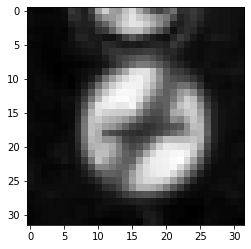

In [110]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [0]:
X_train_gray = color.rgb2gray( X_train ).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray( X_test ).reshape(-1,32,32,1)

In [112]:

model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.2179 - accuracy: 0.3675 - val_loss: 0.5260 - val_accuracy: 0.8244
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.4873 - accuracy: 0.8403 - val_loss: 0.1592 - val_accuracy: 0.9520
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2345 - accuracy: 0.9223 - val_loss: 0.0569 - val_accuracy: 0.9849
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1519 - accuracy: 0.9504 - val_loss: 0.0285 - val_accuracy: 0.9919
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1227 - accuracy: 0.9610 - val_loss: 0.0253 - val_accuracy: 0.9926


0.9668934240362812

Last result highest one : Accuracy 0.966893

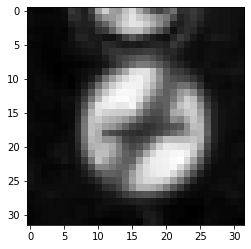

In [113]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'));
